In [1]:
import pandas as pd
import numpy as np
import datetime as dt

import random
import names
import pandas_profiling
import warnings
warnings.filterwarnings("ignore")

import seaborn as sns
import matplotlib.pyplot as plt

import sklearn.model_selection
from sklearn import model_selection
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.ensemble import RandomForestRegressor
import xgboost
import csv as csv
from xgboost import plot_importance

data = pd.read_csv("camp_data.csv", parse_dates=['date'], dayfirst=True)

print (data.shape)
data.head(5)

(75205, 12)


,date,business_vertical,country,region,city_code,strategy_id,channel_name,goal_type,total_spend_cpm,impressions,clicks,conversions
0,2018-09-17,1,2,Aceh Sm,idn-ac-banda aceh,3714868,1,1.0,149.565425,48.0,0.0,0.0
1,2018-09-17,1,2,Aceh Sm,idn-ac-banda aceh,3715603,1,1.0,291.516169,124.0,1.0,0.0
2,2018-09-17,1,2,Aceh Sm,idn-ac-banda aceh,3716560,1,2.0,509.019147,415.0,0.0,0.0
3,2018-09-17,1,2,Aceh Sm,idn-ac-banda aceh,3718685,2,2.0,134.542628,218.0,0.0,0.0
4,2018-09-17,1,2,Aceh Sm,idn-ac-banda aceh,3718702,2,1.0,3.761886,1.0,0.0,0.0


In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75205 entries, 0 to 75204
Data columns (total 12 columns):
date                 75205 non-null datetime64[ns]
business_vertical    75205 non-null int64
country              75205 non-null int64
region               75205 non-null object
city_code            75205 non-null object
strategy_id          75205 non-null int64
channel_name         75205 non-null int64
goal_type            43062 non-null float64
total_spend_cpm      75205 non-null float64
impressions          73703 non-null float64
clicks               73683 non-null float64
conversions          73654 non-null float64
dtypes: datetime64[ns](1), float64(5), int64(4), object(2)
memory usage: 6.9+ MB


In [3]:
data.describe()

,business_vertical,country,strategy_id,channel_name,goal_type,total_spend_cpm,impressions,clicks,conversions
count,75205.000000,75205.000000,7.520500e+04,75205.000000,43062.000000,75205.000000,73703.000000,73683.000000,73654.0
mean,0.572595,1.272110,3.764120e+06,0.834798,1.476940,424.826770,291.512313,0.371049,0.0
std,0.494705,1.330626,3.403133e+04,0.813834,0.499474,5275.184032,4179.601279,7.118569,0.0
min,0.000000,0.000000,3.714868e+06,0.000000,1.000000,0.242250,0.000000,0.000000,0.0
25%,0.000000,0.000000,3.727983e+06,0.000000,1.000000,2.815800,1.000000,0.000000,0.0
50%,1.000000,2.000000,3.771828e+06,1.000000,1.000000,8.621250,4.000000,0.000000,0.0
75%,1.000000,2.000000,3.784636e+06,2.000000,2.000000,32.941426,18.000000,0.000000,0.0
max,1.000000,7.000000,3.828492e+06,2.000000,2.000000,374622.032272,374343.000000,661.000000,0.0


In [4]:
data.isnull().sum()

date                     0
business_vertical        0
country                  0
region                   0
city_code                0
strategy_id              0
channel_name             0
goal_type            32143
total_spend_cpm          0
impressions           1502
clicks                1522
conversions           1551
dtype: int64

In [5]:
data.goal_type.value_counts()

1.0    22524
2.0    20538
Name: goal_type, dtype: int64

In [6]:
#fill goal with majority class
data.goal_type= data.goal_type.fillna(value=1.0)

In [7]:
data.clicks.value_counts()

0.0      71121
1.0       1097
2.0        404
3.0        167
4.0        120
         ...  
184.0        1
87.0         1
120.0        1
233.0        1
97.0         1
Name: clicks, Length: 125, dtype: int64

In [9]:
#fill goal with majority class
data.clicks= data.clicks.fillna(value=0.0)

In [10]:
data.impressions.mean()

291.512312931631

In [11]:
#fill impressions with mean value
data.impressions= data.impressions.fillna(value=data.impressions.mean())

In [12]:
data.conversions.value_counts()

0.0    73654
Name: conversions, dtype: int64

In [13]:
#fill conversions with majority class
data.conversions= data.conversions.fillna(value=0.0)

In [14]:
#convert type to int for numerical columns
data['goal_type']= data['goal_type'].astype(int)
data['impressions']= data['impressions'].astype(int)
data['clicks']= data['clicks'].astype(int)

In [15]:
data.head()

,date,business_vertical,country,region,city_code,strategy_id,channel_name,goal_type,total_spend_cpm,impressions,clicks,conversions
0,2018-09-17,1,2,Aceh Sm,idn-ac-banda aceh,3714868,1,1,149.565425,48,0,0.0
1,2018-09-17,1,2,Aceh Sm,idn-ac-banda aceh,3715603,1,1,291.516169,124,1,0.0
2,2018-09-17,1,2,Aceh Sm,idn-ac-banda aceh,3716560,1,2,509.019147,415,0,0.0
3,2018-09-17,1,2,Aceh Sm,idn-ac-banda aceh,3718685,2,2,134.542628,218,0,0.0
4,2018-09-17,1,2,Aceh Sm,idn-ac-banda aceh,3718702,2,1,3.761886,1,0,0.0


In [16]:
#creating a new column Click through rate (ctr)

data['ctr'] = data.clicks*100/data.impressions

In [17]:
#creating a new column cost per click (cpc)

data['cpc'] = data.total_spend_cpm/data.clicks

In [18]:
data.head(5)

,date,business_vertical,country,region,city_code,strategy_id,channel_name,goal_type,total_spend_cpm,impressions,clicks,conversions,ctr,cpc
0,2018-09-17,1,2,Aceh Sm,idn-ac-banda aceh,3714868,1,1,149.565425,48,0,0.0,0.000000,inf
1,2018-09-17,1,2,Aceh Sm,idn-ac-banda aceh,3715603,1,1,291.516169,124,1,0.0,0.806452,291.516169
2,2018-09-17,1,2,Aceh Sm,idn-ac-banda aceh,3716560,1,2,509.019147,415,0,0.0,0.000000,inf
3,2018-09-17,1,2,Aceh Sm,idn-ac-banda aceh,3718685,2,2,134.542628,218,0,0.0,0.000000,inf
4,2018-09-17,1,2,Aceh Sm,idn-ac-banda aceh,3718702,2,1,3.761886,1,0,0.0,0.000000,inf


In [19]:
#check for distribution
data.ctr.value_counts()

0.000000      63967
0.343643         45
0.687285         18
33.333333         8
100.000000        8
              ...  
0.176184          1
0.605275          1
0.149661          1
0.185376          1
0.659577          1
Name: ctr, Length: 1975, dtype: int64

In [20]:
#check for distribution
data.cpc.value_counts()

inf            72643
6.669000           3
597.802310         2
82.752992          2
712.245709         2
               ...  
2.563240           1
147.943765         1
780.861702         1
1521.100370        1
237.632564         1
Name: cpc, Length: 2510, dtype: int64

In [21]:
#drop column cpc as all values are infinity
data.drop(['cpc'], axis = 1, inplace = True)

In [22]:
#create new columns for week number and day from the date column

data['week'] = data['date'].dt.week
data['day'] = data['date'].dt.day

In [23]:
data.head(3)

,date,business_vertical,country,region,city_code,strategy_id,channel_name,goal_type,total_spend_cpm,impressions,clicks,conversions,ctr,week,day
0,2018-09-17,1,2,Aceh Sm,idn-ac-banda aceh,3714868,1,1,149.565425,48,0,0.0,0.000000,38,17
1,2018-09-17,1,2,Aceh Sm,idn-ac-banda aceh,3715603,1,1,291.516169,124,1,0.0,0.806452,38,17
2,2018-09-17,1,2,Aceh Sm,idn-ac-banda aceh,3716560,1,2,509.019147,415,0,0.0,0.000000,38,17


In [24]:
data.city_code.value_counts()

idn-jt-semarang         205
idn-jk-jakarta          204
idn-ji-surabaya         204
idn-jb-bandung          202
idn-jb-bogor            201
                       ... 
aus-vic-maldon            1
aus-vic-garvoc            1
idn-jk-kebon manggis      1
aus-nsw-mathoura          1
aus-nsw-sandy hollow      1
Name: city_code, Length: 3894, dtype: int64

In [25]:
data.region.value_counts()

New South Wales       12682
Victoria               8368
Queensland             6550
Jawa Timur             4398
Jawa Tengah            4304
                      ...  
North Cotabato            1
Cagayan                   1
Ilocos Sur                1
Misamis Occidental        1
Sarangani                 1
Name: region, Length: 127, dtype: int64

In [26]:
#import other csv's
data_business = pd.read_csv("business_vertical.csv")
data_country = pd.read_csv("country.csv")
data_channel = pd.read_csv("channel_name.csv")

In [27]:
#merge csv to main data frame to create a new df

all_data = pd.merge(pd.merge(pd.merge(data, data_business, how='left', left_on=['business_vertical'], right_on=['label']), 
         data_country, how='left', left_on=['country'], right_on=['label']),
         data_channel, how='left', left_on=['channel_name'], right_on=['label'])

In [28]:
#drop duplicate columns
all_data = all_data.drop(['business_vertical_x',  'country_x', 'channel_name_x','label_x', 'label_y', 'label'], axis = 1, inplace= False)

#rename columns
all_data.rename(columns={'business_vertical_y': 'business_vertical', 'country_y': 'country', 'channel_name_y': 'channel_name'}, inplace=True)

In [29]:
print(all_data.shape)
all_data.head(5)


(75205, 15)


,date,region,city_code,strategy_id,goal_type,total_spend_cpm,impressions,clicks,conversions,ctr,week,day,business_vertical,country,channel_name
0,2018-09-17,Aceh Sm,idn-ac-banda aceh,3714868,1,149.565425,48,0,0.0,0.000000,38,17,Finance,Indonesia,Display
1,2018-09-17,Aceh Sm,idn-ac-banda aceh,3715603,1,291.516169,124,1,0.0,0.806452,38,17,Finance,Indonesia,Display
2,2018-09-17,Aceh Sm,idn-ac-banda aceh,3716560,2,509.019147,415,0,0.0,0.000000,38,17,Finance,Indonesia,Display
3,2018-09-17,Aceh Sm,idn-ac-banda aceh,3718685,2,134.542628,218,0,0.0,0.000000,38,17,Finance,Indonesia,Mobile
4,2018-09-17,Aceh Sm,idn-ac-banda aceh,3718702,1,3.761886,1,0,0.0,0.000000,38,17,Finance,Indonesia,Mobile


In [30]:
data.isnull().sum()

date                    0
business_vertical       0
country                 0
region                  0
city_code               0
strategy_id             0
channel_name            0
goal_type               0
total_spend_cpm         0
impressions             0
clicks                  0
conversions             0
ctr                  8676
week                    0
day                     0
dtype: int64

In [31]:
data.ctr.mean()

0.05492378582228661

In [32]:
#fill ctr with mean value
data.ctr= data.ctr.fillna(value=data.ctr.mean())

In [33]:
#all null values removed
data.isnull().sum()

date                 0
business_vertical    0
country              0
region               0
city_code            0
strategy_id          0
channel_name         0
goal_type            0
total_spend_cpm      0
impressions          0
clicks               0
conversions          0
ctr                  0
week                 0
day                  0
dtype: int64

In [34]:
#T1.Q3: Find sum based on channel_name
all_data[['impressions','clicks','conversions']].groupby(by=[all_data['channel_name']]).sum().groupby(level=[0]).sum()

,impressions,clicks,conversions
channel_name,,,
Display,5753862,3023,0.0
Mobile,9454463,13226,0.0
Unknown,6714089,11091,0.0


In [35]:
#Task1.Q3: Find sum based on country
all_data[['impressions','clicks','conversions']].groupby(by=[all_data['country']]).sum().groupby(level=[0]).sum()

,impressions,clicks,conversions
country,,,
Australia,686768,192,0.0
Hong Kong,1034672,1643,0.0
Indonesia,19166155,24447,0.0
Malaysia,377021,645,0.0
New Zealand,648473,203,0.0
Philippines,9275,210,0.0
Somalia,0,0,0.0
reserved/private,50,0,0.0


In [36]:
#Task1.Q3: Find sum based on business_vertical
all_data[['impressions','clicks','conversions']].groupby(by=[all_data['business_vertical']]).sum().groupby(level=[0]).sum()

,impressions,clicks,conversions
business_vertical,,,
Finance,15208325,16249,0.0
Unknown,6714089,11091,0.0


In [37]:
#Task1.Q4: find cummalative sum for strategy id 3718750
data_filter = all_data[all_data['strategy_id'] == 3718750]

In [38]:
x = data_filter[['impressions','clicks']].groupby(by=[all_data['channel_name'],all_data['date']]).sum().groupby(level=[0]).cumsum()
x

impressions  clicks
channel_name date                           
Display      2018-09-17       200020     206
             2018-09-18       320680     314
             2018-09-19       413328     376
             2018-09-20       505129     458
             2018-09-21       517126     458
             2018-09-22       625158     565
             2018-09-23       724857     670
             2018-09-24       827140     808
             2018-09-25       942216     920
             2018-09-26      1060700    1067
Unknown      2018-09-27         9954      10

In [39]:
#EDA of data from a new package that performs operations and gives insights for the df

profile = pandas_profiling.ProfileReport(all_data)
display(profile)

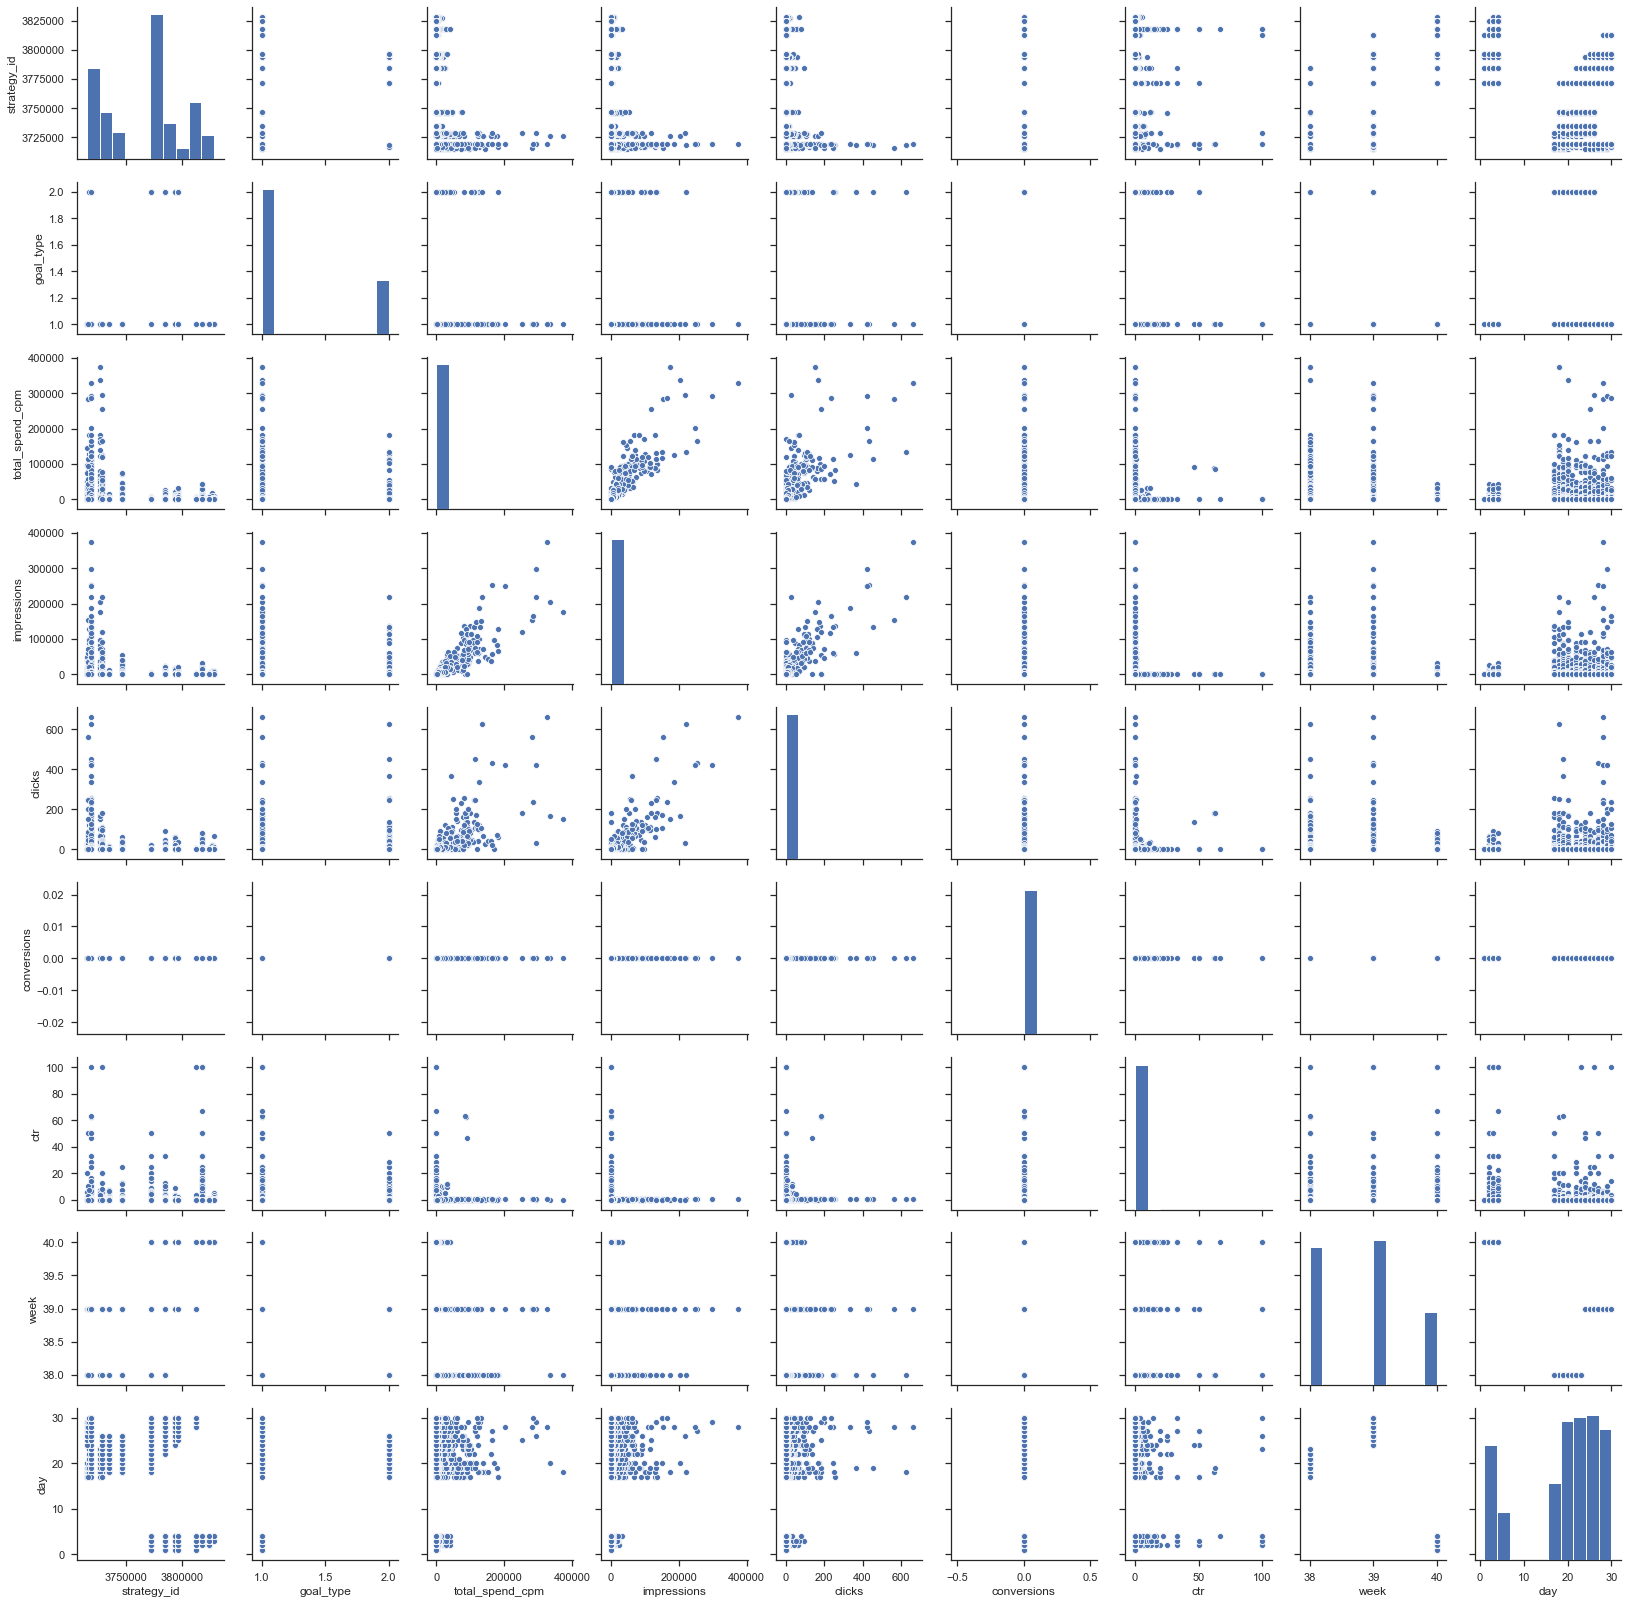

In [40]:
#making a pair plot to see linearity in data

sns.set(style="ticks", color_codes=True)
g = sns.pairplot(all_data)

Text(0.5, 0, 'country')

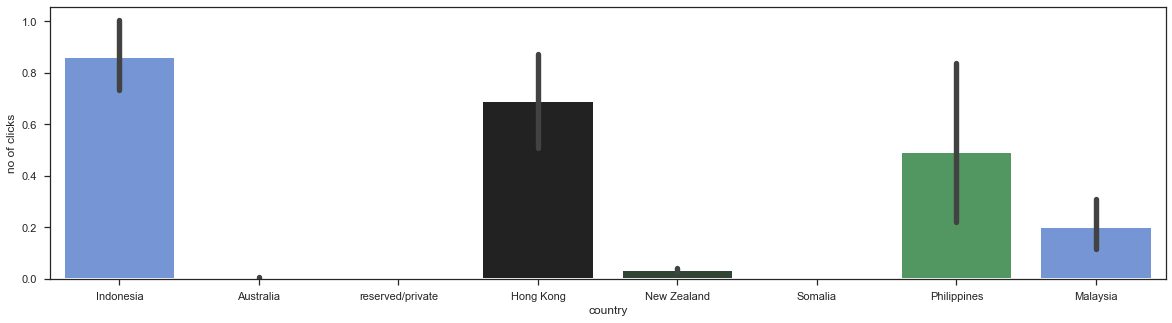

In [41]:
#country with clicks

import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(20,5))
sns.set_context("poster")
current_palette = sns.diverging_palette(255, 133, l=60, n=7, center="dark")

fig = sns.barplot(x='country',y='clicks', data=all_data, palette=current_palette)

fig.set_ylabel("no of clicks")
fig.set_xlabel("country")

Text(0.5, 0, 'country')

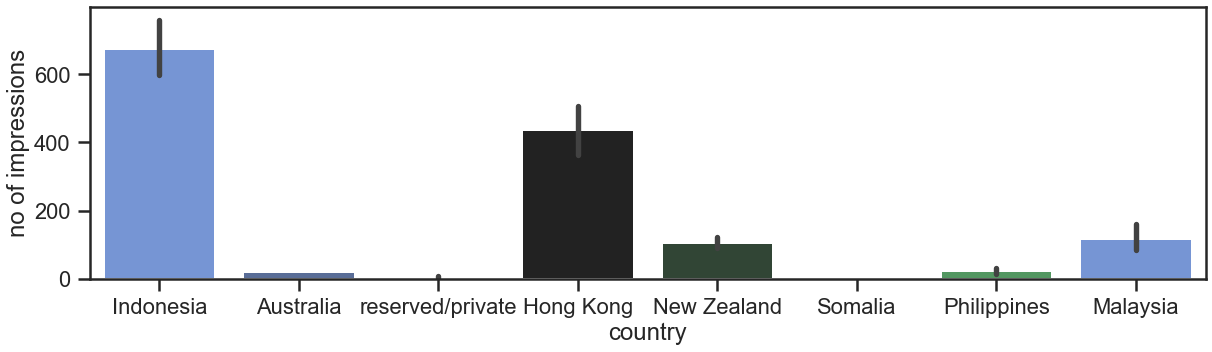

In [42]:
#country with impressions

fig, ax = plt.subplots(figsize=(20,5))
sns.set_context("poster")
current_palette = sns.diverging_palette(255, 133, l=60, n=7, center="dark")

fig = sns.barplot(x='country',y='impressions', data=all_data, palette=current_palette)

fig.set_ylabel("no of impressions")
fig.set_xlabel("country")

Text(0.5, 0, 'channel_name')

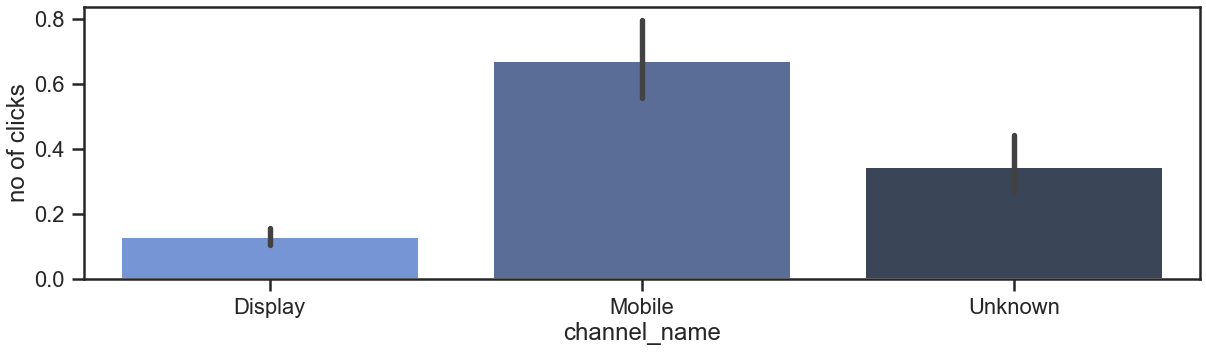

In [43]:
#channel_name with clicks
import seaborn as sns

fig, ax = plt.subplots(figsize=(20,5))
sns.set_context("poster")
current_palette = sns.diverging_palette(255, 133, l=60, n=7, center="dark")

fig = sns.barplot(x='channel_name',y='clicks', data=all_data, palette=current_palette)

fig.set_ylabel("no of clicks")
fig.set_xlabel("channel_name")

Text(0.5, 0, 'channel_name')

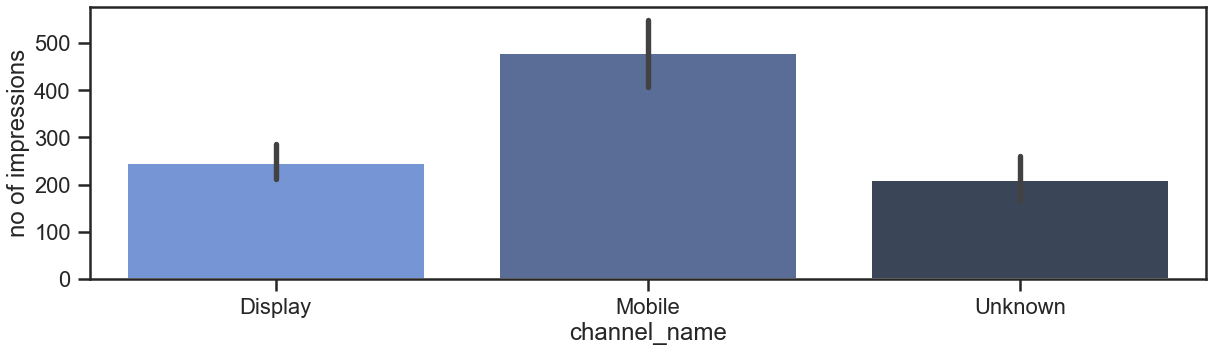

In [44]:
#channel_name with impressions

fig, ax = plt.subplots(figsize=(20,5))
sns.set_context("poster")
current_palette = sns.diverging_palette(255, 133, l=60, n=7, center="dark")

fig = sns.barplot(x='channel_name',y='impressions', data=all_data, palette=current_palette)

fig.set_ylabel("no of impressions")
fig.set_xlabel("channel_name")

Text(0.5, 0, 'business_vertical')

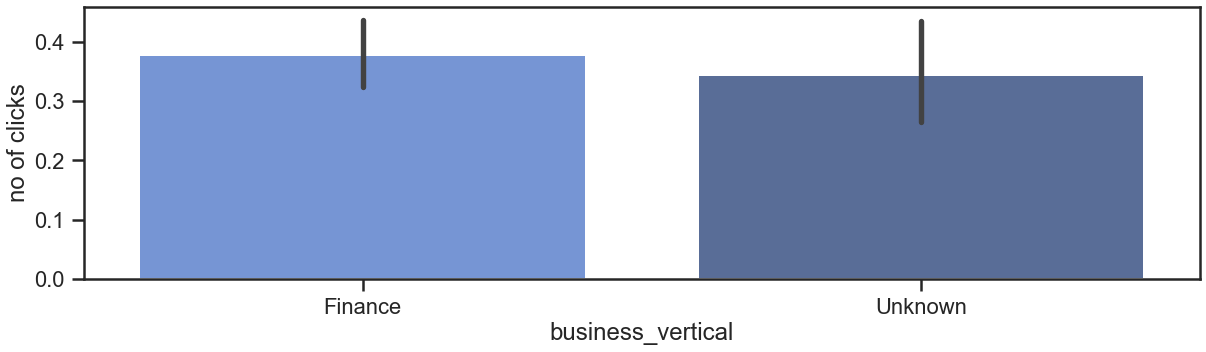

In [45]:
#business_vertical with clicks

fig, ax = plt.subplots(figsize=(20,5))
sns.set_context("poster")
current_palette = sns.diverging_palette(255, 133, l=60, n=7, center="dark")

fig = sns.barplot(x='business_vertical',y='clicks', data=all_data, palette=current_palette)

fig.set_ylabel("no of clicks")
fig.set_xlabel("business_vertical")

Text(0.5, 0, 'business_vertical')

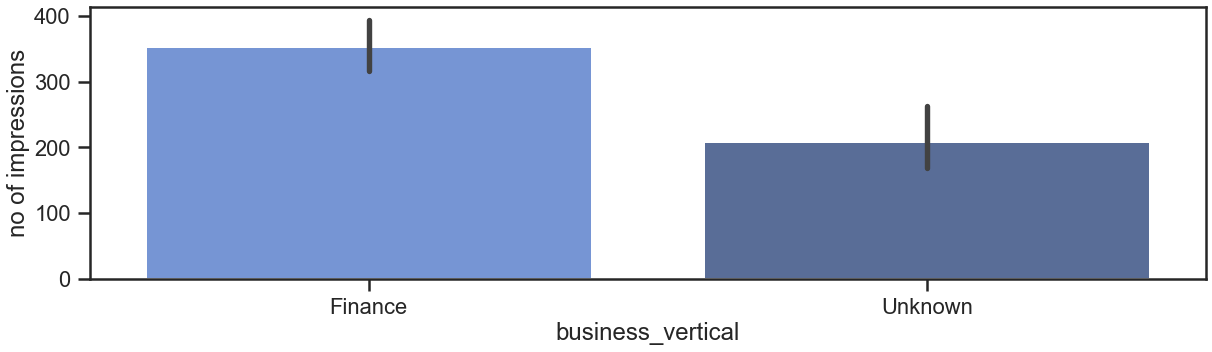

In [46]:
#business_vertical with impressions

fig, ax = plt.subplots(figsize=(20,5))
sns.set_context("poster")
current_palette = sns.diverging_palette(255, 133, l=60, n=7, center="dark")

fig = sns.barplot(x='business_vertical',y='impressions', data=all_data, palette=current_palette)

fig.set_ylabel("no of impressions")
fig.set_xlabel("business_vertical")

In [47]:
#separate test and train

#1 Independent variables We remove date, strategy_id, region,city_code from independent variables as they being having high corelation
X=data[['business_vertical', 'country', 'channel_name', 'goal_type', 'total_spend_cpm', 'ctr', 'week', 'day']]

#2 Dependent variables
y1= data['impressions']
y2= data['clicks']

In [48]:
#prediction of impressions
split_size=0.3

#Creation of Train and Test dataset
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X,y1,test_size=split_size,random_state=22)

#Creation of Train and validation dataset
X_train, X_val, y_train, y_val = train_test_split(X_train,y_train,test_size=0.2,random_state=5)

In [49]:
print(X_train.shape)
print(y_test.shape)

(42114, 8)
(22562,)


In [50]:
#Build base linear model as the task is to make predictions with continuos dependent variables.
#fitting Linear Regression to the Training set

#Modelling of IMPRESSIONS

regressor = LinearRegression()
regressor.fit(X_train, y_train)

y_pred_linear = regressor.predict(X_test)

In [51]:
# Evaluating the Algorithm for test data

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred_linear))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred_linear))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_linear)))
print('R square value is:',r2_score(y_test, y_pred_linear))

Mean Absolute Error: 191.80122325989464
Mean Squared Error: 4294142.552244265
Root Mean Squared Error: 2072.231297959826
R square value is: 0.7993697459673824


In [52]:
#VALIDATION accuracy for LR for IMPRESSIONS

y_pred_linear_val = regressor.predict(X_val)
print('Mean Absolute Error:', metrics.mean_absolute_error(y_val, y_pred_linear_val))  
print('Mean Squared Error:', metrics.mean_squared_error(y_val, y_pred_linear_val))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_val, y_pred_linear_val)))
print('R square value is:',r2_score(y_val, y_pred_linear_val))

Mean Absolute Error: 135.61982963445413
Mean Squared Error: 931476.9037324337
Root Mean Squared Error: 965.1305112431343
R square value is: 0.834846083717942


In [53]:
#fitting Random Forest Regression to the Training set for IMPRESSIONS

regressor_rf = RandomForestRegressor(n_estimators = 50, random_state = 0)
regressor_rf.fit(X_train, y_train)

# Predicting the Test set results
y_pred_rf = regressor_rf.predict(X_test)

In [54]:
# Evaluating the Algorithm for test data for IMPRESSIONS

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred_rf))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred_rf))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_rf)))
print('R square value is:',r2_score(y_test, y_pred_rf))

Mean Absolute Error: 134.4133400147079
Mean Squared Error: 3658965.2758217035
Root Mean Squared Error: 1912.8421983586893
R square value is: 0.8290463989368565


In [55]:
#VALIDATION accuracy for RF for IMPRESSIONS

y_pred_rf_val = regressor_rf.predict(X_val)
print('Mean Absolute Error:', metrics.mean_absolute_error(y_val, y_pred_rf_val))  
print('Mean Squared Error:', metrics.mean_squared_error(y_val, y_pred_rf_val))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_val, y_pred_rf_val)))
print('R square value is:',r2_score(y_val, y_pred_rf_val))

Mean Absolute Error: 89.38301201932309
Mean Squared Error: 1256582.1829512743
Root Mean Squared Error: 1120.9737655053639
R square value is: 0.7772038492708851


In [56]:
#fitting XGBoost Regression to the Training set for IMPRESSIONS

best_xgb_model = xgboost.XGBRegressor(colsample_bytree=0.4,
                 gamma=0,                 
                 learning_rate=0.07,
                 max_depth=3,
                 min_child_weight=1.5,
                 n_estimators=10000,                                                                    
                 reg_alpha=0.75,
                 reg_lambda=0.45,
                 subsample=0.6,
                 seed=42)
best_xgb_model.fit(X_train, y_train)

# Predicting the Test set results
y_pred_xgboost = best_xgb_model.predict(X_test)

[16:26:41] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [57]:
# Evaluating the Algorithm on test data for IMPRESSIONS

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred_xgboost))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred_xgboost))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_xgboost)))
print('R square value is:',r2_score(y_test, y_pred_xgboost))

Mean Absolute Error: 137.6776040931755
Mean Squared Error: 2728445.108553616
Root Mean Squared Error: 1651.8005656112412
R square value is: 0.8725220160758123


In [58]:
#validation accuracy for XG boost for IMPRESSIONS
y_pred_xgboost_val = best_xgb_model.predict(X_val)
print('Mean Absolute Error:', metrics.mean_absolute_error(y_val, y_pred_xgboost_val))  
print('Mean Squared Error:', metrics.mean_squared_error(y_val, y_pred_xgboost_val))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_val, y_pred_xgboost_val)))
print('R square value is:',r2_score(y_val, y_pred_xgboost_val))

Mean Absolute Error: 96.7950421941706
Mean Squared Error: 1089688.788482004
Root Mean Squared Error: 1043.8815969649067
R square value is: 0.8067945965967296


In [63]:
#Modelling for CLICKS

split_size=0.3

#Creation of Train and Test dataset
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X,y2,test_size=split_size,random_state=22)

#Creation of Train and validation dataset
X_train, X_val, y_train, y_val = train_test_split(X_train,y_train,test_size=0.2,random_state=5)

In [64]:
#Build base linear model as the task is to make predictions with continuos dependent variables.
#fitting Linear Regression to the Training set for CLICKS

regressor_c = LinearRegression()
regressor_c.fit(X_train, y_train)

y_pred_linear_c = regressor_c.predict(X_test)

In [65]:
#Evaluation model for test data for CLICKS

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred_linear_c))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred_linear_c))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_linear_c)))
print('R square value is:',r2_score(y_test, y_pred_linear_c))

Mean Absolute Error: 0.5051105167587469
Mean Squared Error: 29.887485610532437
Root Mean Squared Error: 5.466944815025339
R square value is: 0.5627348034557884


In [66]:
#VALIDATION accuracy for LR for CLICKS

y_pred_linear_c_val = regressor_c.predict(X_val)
print('Mean Absolute Error:', metrics.mean_absolute_error(y_val, y_pred_linear_c_val))  
print('Mean Squared Error:', metrics.mean_squared_error(y_val, y_pred_linear_c_val))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_val, y_pred_linear_c_val)))
print('R square value is:',r2_score(y_val, y_pred_linear_c_val))

Mean Absolute Error: 0.34430134852987415
Mean Squared Error: 2.965748594961461
Root Mean Squared Error: 1.7221348945310473
R square value is: 0.6757151658610625


In [67]:
#fitting Random Forest Regression to the Training set for CLICKS

regressor_rf_c = RandomForestRegressor(n_estimators = 50, random_state = 0)
regressor_rf_c.fit(X_train, y_train)

# Predicting the Test set results
y_pred_rf_c = regressor_rf_c.predict(X_test)

In [68]:
# Evaluating the Algorithm for CLICKS

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred_rf_c))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred_rf_c))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_rf_c)))
print('R square value is:',r2_score(y_test, y_pred_rf_c))

Mean Absolute Error: 0.17510238454037763
Mean Squared Error: 13.800321620423722
Root Mean Squared Error: 3.7148784126029915
R square value is: 0.7980960852858974


In [69]:
#VALIDATION accuracy for LR for CLICKS

y_pred_rf_c_val = regressor_rf_c.predict(X_val)
print('Mean Absolute Error:', metrics.mean_absolute_error(y_val, y_pred_rf_c_val))  
print('Mean Squared Error:', metrics.mean_squared_error(y_val, y_pred_rf_c_val))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_val, y_pred_rf_c_val)))
print('R square value is:',r2_score(y_val, y_pred_rf_c_val))

Mean Absolute Error: 0.08767974166587518
Mean Squared Error: 2.0599536138284735
Root Mean Squared Error: 1.4352538499612093
R square value is: 0.7747578074793113


In [70]:
#fitting XGBoost Regression to the Training set for CLICKS

best_xgb_model_c = xgboost.XGBRegressor(colsample_bytree=0.4,
                 gamma=0,                 
                 learning_rate=0.07,
                 max_depth=3,
                 min_child_weight=1.5,
                 n_estimators=10000,                                                                    
                 reg_alpha=0.75,
                 reg_lambda=0.45,
                 subsample=0.6,
                 seed=42)
best_xgb_model_c.fit(X_train, y_train)

# Predicting the Test set results
y_pred_xgboost_c = best_xgb_model_c.predict(X_test)

[16:33:52] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [71]:
# Evaluating the Algorithm for CLICKS

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred_xgboost_c))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred_xgboost_c))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_xgboost_c)))
print('R square value is:',r2_score(y_test, y_pred_xgboost_c))

Mean Absolute Error: 0.22299349702965357
Mean Squared Error: 14.491105800631178
Root Mean Squared Error: 3.806718508194581
R square value is: 0.7879896519691516


In [72]:
#validation accuracy for XG boost for CLICKS
y_pred_xgboost_c_val = best_xgb_model_c.predict(X_val)
print('Mean Absolute Error:', metrics.mean_absolute_error(y_val, y_pred_xgboost_c_val))  
print('Mean Squared Error:', metrics.mean_squared_error(y_val, y_pred_xgboost_c_val))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_val, y_pred_xgboost_c_val)))
print('R square value is:',r2_score(y_val, y_pred_xgboost_c_val))

Mean Absolute Error: 0.12481549225966242
Mean Squared Error: 2.3368661309844856
Root Mean Squared Error: 1.5286811737522268
R square value is: 0.7444792700977232


In [60]:
#creating a NEW df to predict the next week value
df_nextweek = pd.DataFrame([{'business_vertical':0, 'country':0, 'channel_name':0, 'goal_type':0,
       'total_spend_cpm': 100, 'ctr':0.2, 'week':41, 'day':4 }])
df_nextweek.head()

,business_vertical,country,channel_name,goal_type,total_spend_cpm,ctr,week,day
0,0,0,0,0,100,0.2,41,4


In [61]:
#choosing the best model for IMPRESIONS ie XGBoost to predict value
y_pred_nextweek = best_xgb_model.predict(df_nextweek)

In [62]:
y_pred_nextweek

array([367.83627], dtype=float32)

In [73]:
#choosing the best model for CLICKS ie RF model to predict value
y_pred_nextweek_c = regressor_rf_c.predict(df_nextweek)

In [74]:
y_pred_nextweek_c

array([1.])

In [ ]:
#So We get 367.83627 as IMPRESSIONS and 1 as number of CLICKS